<a href="https://colab.research.google.com/github/hmcck27/pythonProject/blob/jk/algorithm_preprocessing_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is the code for preprocessing corpus of Algorithm dataset**


step for preprocessing
1. csv 파일을 pandas dataframe으로 변환한다.
2. description의 \n, \t을 제거
3. 각 지문별 길이 파익해서 visualize
4. 중복되는 문제 수 파악
5. remove english 지문
6. 우리가 정한 라벨 이외의 것들은 제거
7. 문제들간에 여러 알고리즘을 갖는 문제들이 있는지 체크 -> 이 친구들은 어떻게 해야할지 따로 상의해봐야할듯
7. 여러 버전의 전처리 데이터 셋을 만든다.

version 
1. 영어 제거 버전
2. 수식 제거 버전 -> 정규식을 이용해서 제거 ( 참고 자료 : [링크 텍스트](https://wikidocs.net/21703))
3. 수식을 텍스트로 변환 -> 이건 다양하게 버전을 만들어야 ! 회의 때 어떤 수식이 있는지 조사해 오기



**필요한 라이브러리 import**

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**구글 드라이브 마운트**

In [4]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


**pandas를 이용한 csv를 데이터프레임으로 변환**

In [96]:
df = pd.read_csv('/gdrive/My Drive/50625/problem1_df.csv')

In [12]:

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

**description, input, output 에서 엔터,탭 제거**

In [97]:
for i in df.index :
    df.loc[i,"description"] = df.loc[i,"description"].replace('\n',"")
    df.loc[i,"description"] = df.loc[i,"description"].replace('\t',"")
    df.loc[i,"input"] = str(df.loc[i,"input"]).replace('\n',"")
    df.loc[i,"input"] = str(df.loc[i,"input"]).replace('\t',"")
    df.loc[i,"output"] = str(df.loc[i,"output"]).replace('\n',"")
    df.loc[i,"output"] = str(df.loc[i,"output"]).replace('\t',"")


In [99]:
df[5000:5010]
df[0:10]

,tag,id,title,description,input,output
0,Mathematics,1000,A+B,"두 정수 A와 B를 입력받은 다음, A+B를 출력하는 프로그램을 작성하시오.","첫째 줄에 A와 B가 주어진다. (0 < A, B < 10)",첫째 줄에 A+B를 출력한다.
1,Mathematics,1001,A-B,"두 정수 A와 B를 입력받은 다음, A-B를 출력하는 프로그램을 작성하시오.","첫째 줄에 A와 B가 주어진다. (0 < A, B < 10)",첫째 줄에 A-B를 출력한다.
2,Mathematics,10998,A×B,"두 정수 A와 B를 입력받은 다음, A×B를 출력하는 프로그램을 작성하시오.","첫째 줄에 A와 B가 주어진다. (0 < A, B < 10)",첫째 줄에 A×B를 출력한다.
3,Mathematics,10869,사칙연산,"두 자연수 A와 B가 주어진다. 이때, A+B, A-B, A*B, A/B(몫), A...","두 자연수 A와 B가 주어진다. (1 ≤ A, B ≤ 10,000)","첫째 줄에 A+B, 둘째 줄에 A-B, 셋째 줄에 A*B, 넷째 줄에 A/B, 다섯..."
4,Mathematics,1008,A/B,"두 정수 A와 B를 입력받은 다음, A/B를 출력하는 프로그램을 작성하시오.","첫째 줄에 A와 B가 주어진다. (0 < A, B < 10)",첫째 줄에 A/B를 출력한다. 실제 정답과 출력값의 절대오차 또는 상대오차가 10-...
5,Mathematics,2739,구구단,"N을 입력받은 뒤, 구구단 N단을 출력하는 프로그램을 작성하시오. 출력 형식에 맞춰...","첫째 줄에 N이 주어진다. N은 1보다 크거나 같고, 9보다 작거나 같다.",출력형식과 같게 N*1부터 N*9까지 출력한다.
6,Mathematics,10430,나머지,(A+B)%C는 ((A%C) + (B%C))%C 와 같을까?(A×B)%C는 ((A%...,"첫째 줄에 A, B, C가 순서대로 주어진다. (2 ≤ A, B, C ≤ 10000)","첫째 줄에 (A+B)%C, 둘째 줄에 ((A%C) + (B%C))%C, 셋째 줄에 ..."
7,Mathematics,8393,합,"n이 주어졌을 때, 1부터 n까지 합을 구하는 프로그램을 작성하시오.","첫째 줄에 n (1 ≤ n ≤ 10,000)이 주어진다.",1부터 n까지 합을 출력한다.
8,Mathematics,1330,두 수 비교하기,"두 정수 A와 B가 주어졌을 때, A와 B를 비교하는 프로그램을 작성하시오.",첫째 줄에 A와 B가 주어진다. A와 B는 공백 한 칸으로 구분되어져 있다.,첫째 줄에 다음 세 가지 중 하나를 출력한다.A가 B보다 큰 경우에는 '>'를 출력...
9,Mathematics,10871,X보다 작은 수,"정수 N개로 이루어진 수열 A와 정수 X가 주어진다. 이때, A에서 X보다 작은 수...","첫째 줄에 N과 X가 주어진다. (1 ≤ N, X ≤ 10,000)둘째 줄에 수열 ...",X보다 작은 수를 입력받은 순서대로 공백으로 구분해 출력한다. X보다 작은 수는 적...


**지문 길이 체크**

- 여기서는 전체 지문의 길이를 체크한다.
- 숫자가 많아서 지문이 길거나, 영어 지문 때문에 이렇게 길게 체크 되는듯.
- 나중에 영어 지문 제외하고 다시 돌려보자

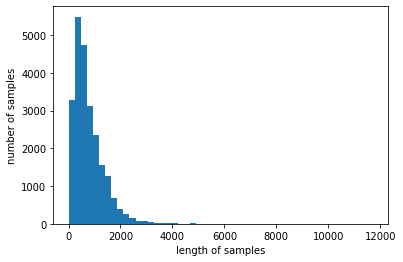

In [101]:
X_data = list()
len(df.index)
for x in range(len(df.index)) :
    X_data.append(len(df["description"].iloc[x]))

plt.hist([int(s/10)*10 for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

**중복 지문 체크**

약 14158개의 지문이 중복된다. 즉 순수하게 하나만 존재하는 지문은 약 7000개 정도

In [26]:
df_temp = pd.DataFrame(df["id"])
dup_data = df_temp.duplicated(["id"])
count = 0
for i in dup_data :
    if (i is True) :
        count+=1
print(count)



14158


**영어 지문 제거 코드**
1. iterate하면서 description column이 영어로 이루어져 있는 항목 제거

In [48]:
import re

def check_korean(check_string) :
    hanCount = len(re.findall(u'[\u3130-\u318F\uAC00-\uD7A3]+', check_string))
    return hanCount > 0

only_english_list = []

for i in df.index :
    if not check_korean(df.loc[i,"description"]) :
        only_english_list.append(i)

print(only_english_list)
df.index
df_drop_english = df.drop(only_english_list)
df_drop_english.set_index('id', inplace=True)
# df_drop_english.loc[255,"description"]

[255, 274, 292, 306, 361, 372, 373, 377, 384, 410, 414, 423, 424, 433, 441, 443, 444, 487, 504, 505, 510, 519, 525, 526, 529, 545, 546, 548, 551, 560, 571, 587, 591, 593, 603, 613, 617, 620, 624, 626, 629, 637, 641, 643, 646, 647, 648, 655, 663, 675, 677, 687, 688, 690, 701, 707, 708, 712, 719, 720, 735, 743, 744, 749, 750, 751, 755, 765, 766, 767, 772, 781, 782, 788, 790, 792, 794, 799, 800, 815, 817, 820, 828, 830, 834, 841, 842, 845, 850, 851, 852, 853, 869, 873, 874, 880, 884, 893, 894, 899, 906, 907, 909, 912, 920, 922, 924, 925, 926, 935, 936, 937, 939, 940, 941, 942, 945, 948, 953, 954, 958, 964, 965, 966, 972, 973, 979, 980, 995, 997, 1006, 1008, 1009, 1010, 1012, 1013, 1018, 1019, 1020, 1024, 1025, 1028, 1031, 1035, 1036, 1038, 1043, 1055, 1057, 1060, 1064, 1066, 1067, 1069, 1070, 1072, 1073, 1074, 1076, 1081, 1082, 1087, 1088, 1093, 1097, 1098, 1103, 1105, 1107, 1114, 1119, 1124, 1125, 1127, 1129, 1132, 1135, 1136, 1138, 1140, 1141, 1145, 1149, 1153, 1157, 1158, 1159, 1160, 1

In [62]:
df_drop_english.index

Int64Index([ 1000,  1001, 10998, 10869,  1008,  2739, 10430,  8393,  1330,
            10871,
            ...
            18831, 19552, 16994,  3763, 19998,  3763, 19998, 20846, 14436,
            17936],
           dtype='int64', name='id', length=13296)

In [49]:
df_drop_english.to_csv('/gdrive/My Drive/50625/problem_drop_english.csv')

**외국어 지문만 있는 dataset 생성**
1. iterate하면서, 외국어로만 이루어져 있는 지문만 남긴다.

In [51]:
only_english_list = []

for i in df.index :
    if check_korean(df.loc[i,"description"]) :
        only_english_list.append(i)

df_only_english = df.drop(only_english_list)
df_only_english.set_index('id', inplace=True)

df_only_english.to_csv('/gdrive/My Drive/50625/problem_only_english.csv')

**외국어 지문 제외한 df_drop_english에서 다시 지문 길이 세기**

In [74]:
df_drop_english.index

Int64Index([ 1000,  1001, 10998, 10869,  1008,  2739, 10430,  8393,  1330,
            10871,
            ...
            18831, 19552, 16994,  3763, 19998,  3763, 19998, 20846, 14436,
            17936],
           dtype='int64', name='id', length=13296)

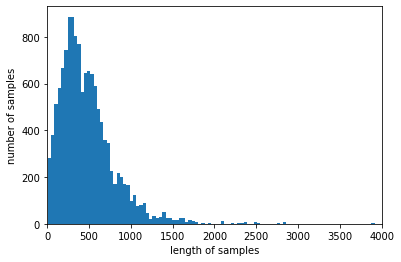

average length :  485.81580926594467
median length :  417.0


In [104]:
X_data = list()
for x in range(len(df_drop_english.index)) :
    X_data.append(len(df_drop_english["description"].iloc[x]))


plt.hist([int(s/10)*10 for s in X_data], bins=300)
plt.xlim(0,4000)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

np_length_list = np.array(X_data)


print('average length : ', np.mean(np_length_list))
print('median length : ', np.median(np_length_list))

**총 몇개의 알고리즘이 있는지 체크**

1. 총 167개의 알고리즘이 있다.
2. 이중에서 우리가 찾는 알고리즘이 있는지 ?

In [114]:
temp = list(df_drop_english["tag"])
algo_dict = dict()
for tmp in temp :
    if tmp in algo_dict :
        algo_dict[tmp] += 1
    else :
        algo_dict[tmp] = 1

print("(알고리즘 이름,","문제 개수)")
for item in algo_dict.items() :
    print(item)

print(len(set(temp)))

# mathmatic

(알고리즘 이름, 문제 개수)
('Mathematics', 1377)
('Dynamic programming', 1022)
('Implementation', 1058)
('Graph theory', 835)
('Data structures', 753)
('Greedy', 412)
('String', 452)
('Graph traversal', 446)
('Bruteforcing', 373)
('Segment tree', 304)
('Tree', 284)
('Sorting', 302)
('Binary search', 275)
('Geometry', 239)
('Number theory', 293)
('Breadth-first search', 260)
('Combinatorics', 142)
('Arithmetic', 202)
('Prefix sum', 154)
('Depth-first search', 154)
("Dijkstra's", 143)
('Simulation', 148)
('Bitmask', 131)
('Disjoint set', 106)
('Backtracking', 138)
('Divide and conquer', 120)
('Ad-Hoc', 105)
('Constructive', 74)
('Sweeping', 80)
('Stack', 83)
('Maximum flow', 85)
('Dynamic programming on trees', 73)
('Priority queue', 86)
('Case work', 75)
('Parsing', 69)
('Segment tree with lazy propagation', 69)
('Two-pointer', 74)
('Dynamic programming using bitfield', 64)
('Set / Map by trees', 60)
('Primality test', 86)
('Game theory', 77)
('Exponentiation by squaring', 75)
('Offline queries',

**우리가 정한 라벨 이외의 알고리즘 문제들을 제거**

1. bruteforcing
2. 구현
3. greedy
4. binary search
5. DFS
6. BFS
7. dijkstra
8. mathmatics - 애매한 문제 → 너무 포괄적 
9. string
10. dynamic programming
11. divide and conquer

In [ ]:
label_list = ['bruteforcing','greedy','binary search','Breadth-first search','Implementation','String','Dynamic programming']